Author: Louis Owen (https://louisowen6.github.io/)

In [1]:
from newspaper import Article
import newspaper

import pandas as pd
import re
import matplotlib.pyplot as plt

# Data Gathering

In [4]:
urls_dict = {'history':
               [
               'https://followinghadrian.com/2021/05/18/spring-ad-121-hadrian-departs-for-the-northern-provinces-hadrian1900/',
               'https://followinghadrian.com/2021/04/26/26-april-ad-121-future-philosopher-emperor-marcus-aurelius-is-born-hadrian1900/',
               'https://followinghadrian.com/2021/03/21/early-ad-121-plotina-writes-to-hadrian-on-behalf-of-the-epicurean-school-in-athens-hadrian1900/',
               'https://clioantiquities.wordpress.com/2020/07/21/with-the-world-distracted-turkeys-government-cancels-byzantine-history/',
               'https://www.historyoftheancientworld.com/2018/07/spells-charms-erotic-dolls-love-magic-in-the-ancient-mediterranean/',
               'https://www.historyoftheancientworld.com/2018/07/basel-papyrus-is-an-ancient-medical-text-researchers-find/',
               'https://www.historyoftheancientworld.com/2018/06/romes-flaminian-obelisk-an-epic-journey-from-divine-egyptian-symbol-to-tourist-attraction/',
               'https://www.historyoftheancientworld.com/2018/06/research-network-sheds-new-light-on-drinking-and-eating-habits-in-the-roman-world/',
               'https://blogs.transparent.com/latin/ancient-roman-gladiator-ads/',
               'https://blogs.transparent.com/latin/roman-political-graffiti/'
               ],
             'economy':
               [
               'http://www.inquiriesjournal.com/articles/1794/the-impact-of-economic-complexity-on-productive-structure-and-income-inequality-in-indonesia-and-venezuela',
               'http://www.inquiriesjournal.com/articles/1869/a-barrier-to-prosperity-analyzing-the-impact-of-israeli-security-policy-on-palestinian-manufacturing-productivity',
               'http://www.inquiriesjournal.com/articles/1843/a-postcolonial-theory-of-value-broadening-economic-scholarship-through-disciplinary-mimetic-valuation',
               'http://www.inquiriesjournal.com/articles/1729/japan-at-work-in-the-21st-century-an-analysis-of-developing-labor-practices-in-japan-and-institutional-barriers-to-reform',
               'http://www.inquiriesjournal.com/articles/1724/mnc-decision-making-under-sanctions-south-africa-and-rhodesia',
               'http://www.inquiriesjournal.com/articles/1633/how-have-corruption-scandals-and-president-roussefs-impeachment-in-brazil-impacted-its-economy',
               'http://www.inquiriesjournal.com/articles/1512/the-asean-experience-northeast-asia-and-beyond-free-trade-and-economic-integration',
               ],
             'covid19':
              [
               'https://www.nejm.org/doi/full/10.1056/NEJMoa2105385?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMc2104849?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMp2102256?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMoa2105000?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMc2103825?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMoa2034545?query=featured_coronavirus',
               'https://www.nejm.org/doi/full/10.1056/NEJMc2031670?query=featured_coronavirus',
               'https://www.karger.com/Article/FullText/515128',
               'https://www.karger.com/Article/FullText/515165',
               'https://www.karger.com/Article/FullText/515343',
              ],
             'geography':
             [
               'https://www.nationalgeographic.org/encyclopedia/geography/',
               'https://www.sciencedaily.com/releases/2021/05/210520145347.htm',
               'https://www.sciencedaily.com/releases/2021/05/210517124927.htm',
               'https://en.wikipedia.org/wiki/Biogeography',
               'https://en.wikipedia.org/wiki/Climatology',
               'https://en.wikipedia.org/wiki/Environmental_science',
               'https://en.wikipedia.org/wiki/Landscape_architecture'
             ],
             'environment':
             [
               'https://en.wikipedia.org/wiki/Natural_environment',
               'https://en.wikipedia.org/wiki/Renewable_energy',
               'https://en.wikipedia.org/wiki/Climate_change',
               'https://en.wikipedia.org/wiki/Carbon_footprint',
               'https://en.wikipedia.org/wiki/Waste_management',
               'https://oecd-environment-focus.blog/2020/02/04/carbon-tax-emissions-reduction-and-employment-some-evidence-from-france/',
               'https://oecd-environment-focus.blog/2020/12/23/securing-natural-capital-on-land/',
               'https://oecd-environment-focus.blog/2020/12/02/is-the-covid-19-crisis-spurring-a-transition-to-net-zero-emissions-in-the-oil-and-gas-sector/',
               'https://blogs.lse.ac.uk/businessreview/2017/07/21/whats-holding-back-investment-and-innovation-in-renewable-energy/',
               'http://oecdinsights.org/2017/04/19/can-green-bonds-fuel-the-low-carbon-transition/',
               'https://oecdinsights.org/2016/11/04/urban-green-growth-is-about-asking-the-right-questions-at-the-right-time/',
             ],
             'technology':
             [
               'https://www.sciencedaily.com/releases/2021/05/210518114809.htm',
               'https://www.sciencedaily.com/releases/2021/05/210518114153.htm',
               'https://www.sciencedaily.com/releases/2021/05/210518114209.htm',
               'https://www.sciencenews.org/article/methanol-fuel-beetle-robot',
               'https://www.theguardian.com/technology/2009/oct/23/internet-40-history-arpanet',
               'https://www.newyorker.com/magazine/2011/05/16/creation-myth',
               'https://deadspin.com/a-nation-of-echo-chambers-how-the-internet-closed-off-1674576436',
               'https://www.newyorker.com/magazine/2017/08/28/who-owns-the-internet',
             ],
             'health':
             [
               'https://www.wired.com/2009/10/ff-waronscience/',
               'https://www.nybooks.com/articles/2011/06/23/epidemic-mental-illness-why/',
               'https://www.economist.com/1843/2019/02/28/death-of-the-calorie',
               'https://aeon.co/essays/the-next-pandemic-will-be-nothing-like-ebola',
               'https://www.sharecare.com/health/aging-and-fitness/article/want-keep-heart-brain-young',
               'https://www.sharecare.com/health/aging-mental-health/article/3-ways-to-maintain-focus-as-you-age',
               'https://www.sharecare.com/health/air-quality/article/is-indoor-air-quality-at-work-home-killing-you',
               'https://www.sharecare.com/health/asthma-respiratory-problems/article/what-you-need-to-know-about-asthma'
             ],
             'biology':
             [
               'https://www.sciencedaily.com/releases/2021/05/210519120726.htm',
               'https://www.sciencedaily.com/releases/2021/05/210519120805.htm',
               'https://www.sciencedaily.com/releases/2021/05/210520133738.htm',
               'https://www.sciencedaily.com/releases/2021/05/210520133711.htm',
               'https://www.sciencedaily.com/releases/2021/05/210519162613.htm',
               'https://www.sciencedaily.com/releases/2021/05/210520133706.htm',
               'https://www.sciencedaily.com/releases/2021/05/210519114803.htm'
             ],
             'chemistry':
             [
               'https://www.sciencenews.org/article/nano-tech-nutrients-protect-plants-fungus-disease-food-agriculture',
               'https://www.sciencenews.org/article/chemistry-recycling-plastic-landfills-trash-materials',
               'https://www.sciencenews.org/article/new-weird-hybrid-chemical-bond-hydrogen-covalent',
               'https://www.sciencenews.org/article/zinc-air-batteries-single-use-new-design-rechargeable',
               'https://www.sciencenews.org/article/new-iron-based-catalyst-converts-carbon-dioxide-into-jet-fuel',
               'https://www.sciencenews.org/article/portable-device-chili-pepper-heat-capsaicin',
               'https://www.sciencenews.org/article/heat-deltamethrin-pesticide-resistant-mosquitoes-insecticide',
               'https://www.sciencenews.org/article/how-this-tube-worm-slime-goo-mucus-can-glow-blue'
             ],
            }

In [5]:
article_dict = {'category':{},'author':{},'publish_date':{},'text':{},'url':{}}
idx = 0
for category in urls_dict:
    for url  in urls_dict[category]:
        article = Article(url)
        article.download()
        article.parse()
        article_dict['category'][idx] = category
        article_dict['author'][idx] = article.authors
        article_dict['publish_date'][idx] = article.publish_date
        article_dict['text'][idx] = article.text
        article_dict['url'][idx] = url
        
        idx += 1

In [6]:
df_article = pd.DataFrame(article_dict)

In [7]:
df_article

,category,author,publish_date,text,url
0,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-05-18 00:00:00,Shortly after celebrating Rome’s birthday (see...,https://followinghadrian.com/2021/05/18/spring...
1,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-04-26 00:00:00,"Happy 1900th birthday, Marcus Aurelius! 🎉\n\nM...",https://followinghadrian.com/2021/04/26/26-apr...
2,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-03-21 00:00:00,"In the early year of AD 121, Pompeia Plotina, ...",https://followinghadrian.com/2021/03/21/early-...
3,history,[],2020-07-21 00:00:00,The term “cancel culture” has been widely used...,https://clioantiquities.wordpress.com/2020/07/...
4,history,[Theme],2018-07-08 11:44:56+00:00,By Marguerite Johnson\n\nIt was a well-kept se...,https://www.historyoftheancientworld.com/2018/...
...,...,...,...,...,...
71,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2021-01-05 11:00:00-05:00,Zinc-air batteries have a lot going for them. ...,https://www.sciencenews.org/article/zinc-air-b...
72,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2020-12-22 16:00:50-05:00,"Today, airplanes pump a lot of climate-warming...",https://www.sciencenews.org/article/new-iron-b...
73,chemistry,"[Erin Garcia De Jesús, Jake Buehler, Maria Tem...",2020-11-10 14:00:00-05:00,Just how hot is your chili pepper? A new chili...,https://www.sciencenews.org/article/portable-d...
74,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2020-10-19 10:00:00-04:00,A few minutes in the microwave made a common i...,https://www.sciencenews.org/article/heat-delta...


# Data Cleaning

In [59]:
def clean_base(text):
    return re.sub('\u200b',' ',re.sub(r'\n{2,}', '\n', text))

def clean_inquiriesjournal(text):
    return re.sub('Abstract ','',clean_base(text))

def clean_karger(text):
    return re.sub('Abstract\n','',clean_base(text))

def clean_wikipedia_web_data(text):
    filtered_text = text.split('See also')[0]
    
    # Remove Brackets
    filtered_text = re.sub(r'\[.*?\]+', '', filtered_text)
    
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', filtered_text)
    
    # Remove part starting from "lihat pula"
    filtered_text = filtered_text.split('lihat pula')[0].strip()
    filtered_text = filtered_text.split('Lihat pula')[0].strip()
    filtered_text = filtered_text.split('Lihat Pula')[0].strip()
    filtered_text = filtered_text.split('lihat juga')[0].strip()
    filtered_text = filtered_text.split('Lihat juga')[0].strip()
    filtered_text = filtered_text.split('Lihat Juga')[0].strip()
    
    return filtered_text


def clean_agg_data(row):
    if 'inquiriesjournal' in row['url']:
        return clean_inquiriesjournal(row['text'])
    elif 'karger' in row['url']:
        return clean_karger(row['text'])
    elif 'wikipedia' in row['url']:
        return clean_wikipedia_web_data(row['text'])
    else:
        return clean_base(row['text'])

In [60]:
df_article['clean_text'] = df_article.apply(lambda x: clean_agg_data(x),axis=1)
df_article['len_chars'] = df_article['clean_text'].apply(lambda x: len(x))

In [61]:
df_article

,category,author,publish_date,text,url,clean_text,len_chars
0,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-05-18 00:00:00,Shortly after celebrating Rome’s birthday (see...,https://followinghadrian.com/2021/05/18/spring...,Shortly after celebrating Rome’s birthday (see...,15638
1,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-04-26 00:00:00,"Happy 1900th birthday, Marcus Aurelius! 🎉\n\nM...",https://followinghadrian.com/2021/04/26/26-apr...,"Happy 1900th birthday, Marcus Aurelius! 🎉\nMar...",13329
2,history,"[View All Posts Followinghadrian, I Came, I Sa...",2021-03-21 00:00:00,"In the early year of AD 121, Pompeia Plotina, ...",https://followinghadrian.com/2021/03/21/early-...,"In the early year of AD 121, Pompeia Plotina, ...",15718
3,history,[],2020-07-21 00:00:00,The term “cancel culture” has been widely used...,https://clioantiquities.wordpress.com/2020/07/...,The term “cancel culture” has been widely used...,11474
4,history,[Theme],2018-07-08 11:44:56+00:00,By Marguerite Johnson\n\nIt was a well-kept se...,https://www.historyoftheancientworld.com/2018/...,By Marguerite Johnson\nIt was a well-kept secr...,7524
...,...,...,...,...,...,...,...
71,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2021-01-05 11:00:00-05:00,Zinc-air batteries have a lot going for them. ...,https://www.sciencenews.org/article/zinc-air-b...,Zinc-air batteries have a lot going for them. ...,2100
72,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2020-12-22 16:00:50-05:00,"Today, airplanes pump a lot of climate-warming...",https://www.sciencenews.org/article/new-iron-b...,"Today, airplanes pump a lot of climate-warming...",1734
73,chemistry,"[Erin Garcia De Jesús, Jake Buehler, Maria Tem...",2020-11-10 14:00:00-05:00,Just how hot is your chili pepper? A new chili...,https://www.sciencenews.org/article/portable-d...,Just how hot is your chili pepper? A new chili...,2844
74,chemistry,"[Maria Temming, Jake Buehler, Charles Q. Choi,...",2020-10-19 10:00:00-04:00,A few minutes in the microwave made a common i...,https://www.sciencenews.org/article/heat-delta...,A few minutes in the microwave made a common i...,4673


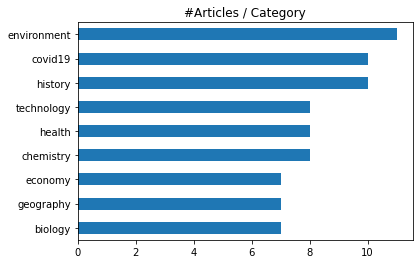

In [62]:
df_article['category'].value_counts().sort_values().plot(kind='barh')
plt.title('#Articles / Category')
plt.show()

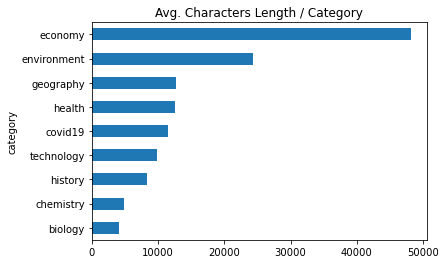

In [63]:
df_article.groupby('category').mean()['len_chars'].sort_values().plot(kind='barh')
plt.title('Avg. Characters Length / Category')
plt.show()

In [64]:
df_article.to_csv('../data/en_ver/articles_data.tsv',sep='\t',index=False)

# Frequency Stopwords Extraction

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

thres = 0.55
stopwords = []

for category in df_article['category'].unique():
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df_article[df_article['category']==category]['clean_text'].to_list())

    word_freq = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
    word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)
    
    stopwords_perc = 100*word_freq_sum/word_freq_sum.sum()
    stopwords_perc = stopwords_perc[stopwords_perc>thres]
    stopwords_temp = stopwords_perc.index.to_list()
    
    for stopword in stopwords_temp:
        if stopword not in stopwords:
            stopwords.append(stopword)
    
    print(category.upper())
    display(stopwords_perc[stopwords_perc>thres])

HISTORY


the        7.313770
of         4.145974
and        3.288187
to         2.595937
in         2.385252
was        1.294206
with       0.933032
on         0.880361
from       0.835214
is         0.752445
for        0.744921
as         0.737397
his        0.692250
by         0.692250
that       0.692250
it         0.579383
hadrian    0.571859
dtype: float64

ECONOMY


the         7.073981
of          3.522899
and         2.693508
to          2.675390
in          2.113739
economic    0.823352
that        0.803221
for         0.801208
as          0.779064
is          0.762959
from        0.694514
on          0.690488
with        0.603926
dtype: float64

COVID19


the          5.685894
of           4.039513
and          3.151643
in           2.657729
to           2.163815
with         1.152467
for          1.134827
is           0.893750
patients     0.852590
sars         0.817311
cov          0.817311
or           0.758511
infection    0.734991
were         0.687952
19           0.676192
was          0.646792
that         0.640913
this         0.629153
from         0.570353
be           0.564473
dtype: float64

GEOGRAPHY


the          6.905527
of           4.960955
and          4.088195
in           2.281427
to           2.220181
as           1.255550
is           1.056500
landscape    1.025877
that         0.880416
for          0.788547
climate      0.719645
on           0.681366
by           0.589496
study        0.551217
from         0.551217
dtype: float64

ENVIRONMENT


the       5.652324
and       3.626764
of        3.579887
to        2.494325
in        2.311754
is        1.356953
energy    1.043620
for       1.036218
as        0.996743
are       0.900523
by        0.784565
that      0.705615
from      0.680943
carbon    0.651337
on        0.599526
waste     0.550183
dtype: float64

TECHNOLOGY


the     6.557504
to      2.942767
of      2.718777
and     2.278520
in      1.784197
that    1.575655
it      1.313045
was     1.019541
is      1.004094
on      0.857341
for     0.826446
you     0.795551
as      0.702866
this    0.695142
with    0.687418
at      0.671970
he      0.587009
dtype: float64

HEALTH


the     5.363818
and     3.008971
of      2.865687
to      2.678794
in      2.130576
that    1.806628
is      1.127585
it      0.946923
as      0.847246
for     0.753800
he      0.691503
you     0.685273
or      0.672813
by      0.616746
with    0.604286
was     0.585597
are     0.573137
your    0.566908
more    0.554448
dtype: float64

BIOLOGY


the      5.971158
of       3.492564
in       2.996845
to       2.523659
that     1.870212
and      1.847679
for      1.104101
is       0.878774
we       0.833709
with     0.766111
this     0.698513
it       0.653447
can      0.653447
cells    0.608382
as       0.608382
at       0.585849
are      0.585849
dtype: float64

CHEMISTRY


the         6.486664
of          3.177478
to          2.535397
in          2.239052
and         2.140270
that        1.448798
plastic     1.020744
is          0.938426
are         0.839644
for         0.790254
says        0.707935
as          0.675008
be          0.625617
new         0.625617
it          0.625617
from        0.609154
hydrogen    0.592690
with        0.592690
dtype: float64

In [66]:
stopwords

['the',
 'of',
 'and',
 'to',
 'in',
 'was',
 'with',
 'on',
 'from',
 'is',
 'for',
 'as',
 'his',
 'by',
 'that',
 'it',
 'hadrian',
 'economic',
 'patients',
 'sars',
 'cov',
 'or',
 'infection',
 'were',
 '19',
 'this',
 'be',
 'landscape',
 'climate',
 'study',
 'energy',
 'are',
 'carbon',
 'waste',
 'you',
 'at',
 'he',
 'your',
 'more',
 'we',
 'can',
 'cells',
 'plastic',
 'says',
 'new',
 'hydrogen']

In [67]:
with open('../resources/en_ver/freq_stopwords.txt','w') as f_out:
    for stopword in stopwords:
        f_out.write(stopword+'\n')

In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords_list = stopwords.words('english')
print(nltk_stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/louisowen6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
with open('../resources/en_ver/nltk_stopwords.txt','w') as f_out:
    for stopword in nltk_stopwords_list:
        f_out.write(stopword+'\n')

# WordCloud

In [72]:
stopwords = []

with open('../resources/en_ver/freq_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))
        
with open('../resources/en_ver/nltk_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))

In [73]:
stopwords

['the',
 'of',
 'and',
 'to',
 'in',
 'was',
 'with',
 'on',
 'from',
 'is',
 'for',
 'as',
 'his',
 'by',
 'that',
 'it',
 'hadrian',
 'economic',
 'patients',
 'sars',
 'cov',
 'or',
 'infection',
 'were',
 '19',
 'this',
 'be',
 'landscape',
 'climate',
 'study',
 'energy',
 'are',
 'carbon',
 'waste',
 'you',
 'at',
 'he',
 'your',
 'more',
 'we',
 'can',
 'cells',
 'plastic',
 'says',
 'new',
 'hydrogen',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and'

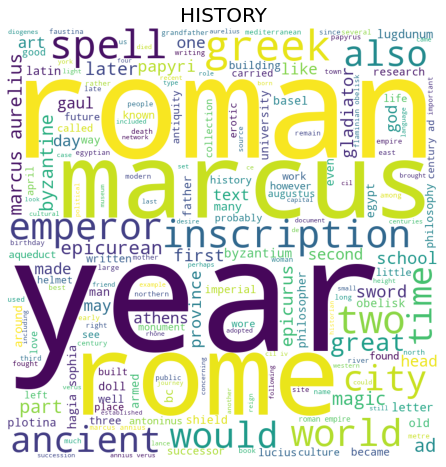

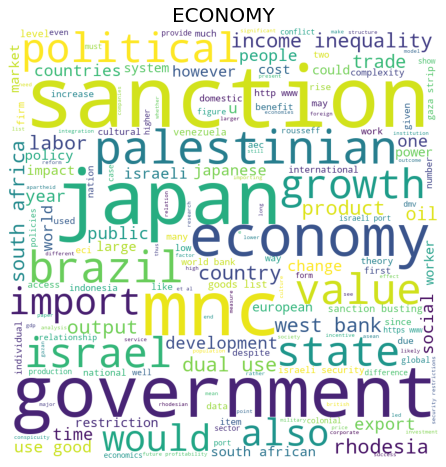

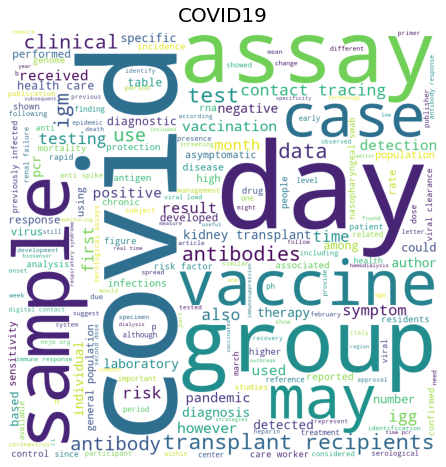

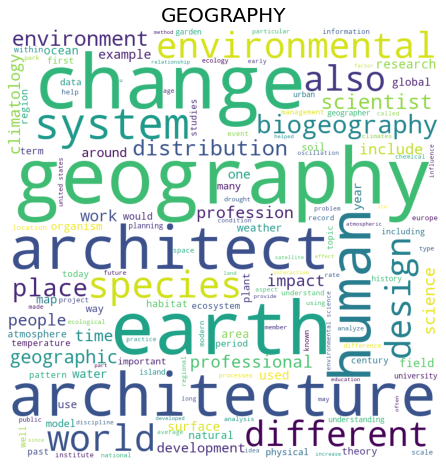

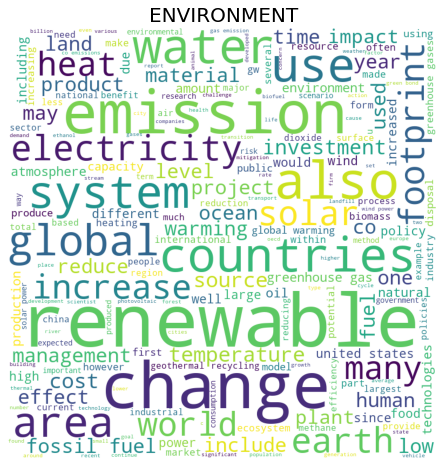

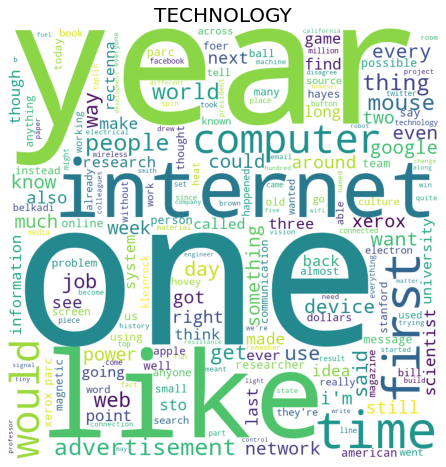

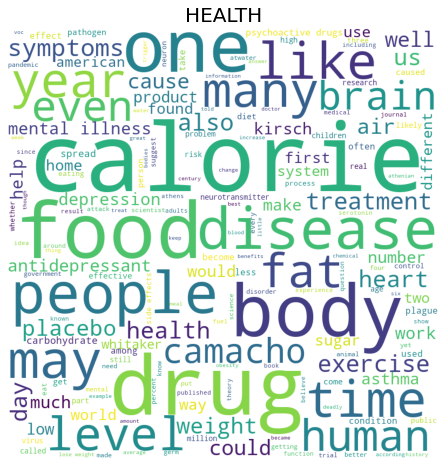

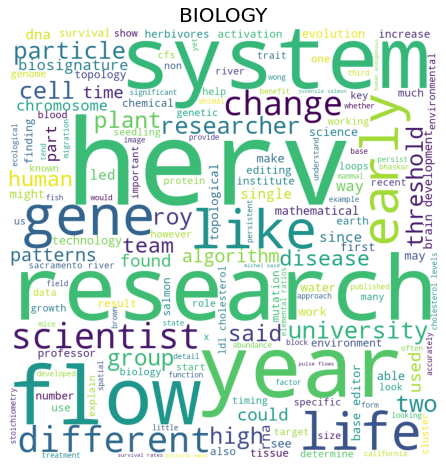

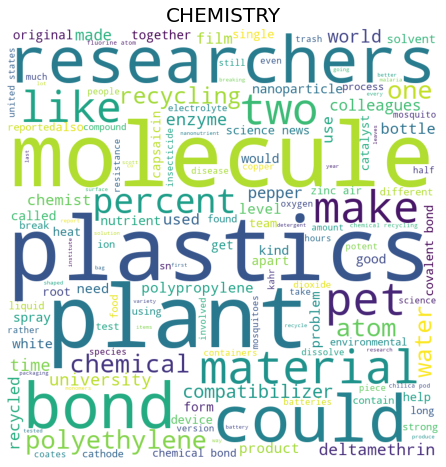

In [74]:
from wordcloud import WordCloud


for category in df_article['category'].unique():
    comment_words = ''

    for val in df_article[df_article['category']==category]['clean_text']:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(category.upper(),fontsize=20)

    plt.show()